# Machine Learning

Before providing outputs, a model needs to be trained, for which we need:

-   Data
-   Model
-   Objective Function
-   Optimization Algorithm

3 Types of Machine Learning

-   Supervised: Has labeled Data and Target outputs.

    There are 2 types: Classification and Regression

-   Unsupervised: Non labeled data, tries to find patters and logic on the data to create categories
-   Reinforcement: Consits on rewarding the algorithm based on its achievements

## Linear Model 

The simplest model

$y = ax +b$

$weight = inputs * outputs$ and do not depend on the number of observations

### Objective Functions

Measures how well our model's outputs match the targets

-   Loss Functios (or Cost Functions)
-   Reward Functions

### Regression Fuctions:

Outputs Numbers

Loss Function:

    L2-Norm = OLS in statistics

$\sum_{i}=(y_{i}-t_{i})^{2}$

### Classification Fuctions:

Outputs Categories
(dummy variables are created to turn the categories into numerical data (0's and 1's) so that the algorithm can calculate them)

Loss Function:

    Cross Entropy loss

### Gradient Descent

Is a mathematical term. It is the multivarivative generalization of the derivative concept

Is a type of optimization Algorithm in which the learning rate equals the greek letter 'eta' $= \eta$

A high learning rate is faster but may not reach the minimum, whereas a smaller one is slower but will most certainly reach the minimum

### Pratical Example

In [92]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

    Generating random input data

For real cases we would already have real and meaningful data to import, this is just for showcasing the methodology

In [93]:
observations = 1000

xs = np.random.uniform(low=-10,high=10,size=(observations,1)) #(lowest point, highest point, interval)
zs = np.random.uniform(-10,10,(observations,1)) #the variables do not need to be declared, just specified in the correct order

inputs = np.column_stack((xs,zs)) #combining xs and zs
inputs.shape

(1000, 2)

Creating the targets

! Real data always contains noise

We may change the values on the target fuction in any way we wish, the algorithm will still work the same

In [94]:
noise = np.random.uniform(-1,1,(observations,1))

# arbitrary target function 
targets = 2*xs-3*zs+5+noise # the noise is to add a little of randomization to the data so it wont be perfect

targets.shape

(1000, 1)

Inicializing variables

In [95]:
init_range = 0.1

weights = np.random.uniform(-init_range,init_range,size=(2,1))

biases = np.random.uniform(-init_range,init_range,size=1)

print(weights,biases)


[[ 0.04422708]
 [-0.0483087 ]] [0.01291637]


Setting a learning rate

In [96]:
learning_rate = 0.001

Training the model

w = weight

$w_{i+1}=w_{i}-\eta \nabla_{w} L(y,t)$

b = biases

$b_{i+1}=b_{i}-\eta \nabla_{b} L(y,t)$

L(y,t) => Loss function

where y = outputs, t = targets

In [97]:
for i in range(10000):
    outputs = np.dot(inputs,weights) + biases #np.dot = scalar multiplication of matrices
    deltas = outputs-targets

    loss = np.sum(deltas**2)/2/observations # this will return the average loss by 

    print(loss) # if it decreases with each iteration, it means the algorithm is improving

    deltas_scaled =deltas/observations

    weights = weights-learning_rate*np.dot(inputs.T,deltas_scaled) #the inputs are being transposed to respect the matrices multiplication rules
    biases =  biases-learning_rate*np.sum(deltas_scaled)

218.94091472474878
205.56758726554878
193.05891616177672
181.35883663368918
170.41492323520208
160.17815337419623
150.6026862137781
141.6456559531866
133.26697855227772
125.42917102450697
118.0971824803404
111.23823615631842
104.82168171481668
98.81885714611694
93.20295964793873
87.94892489827673
83.03331417543475
78.43420881471056
74.13111152443233
70.1048541151273
66.3375112246564
62.812319649310396
59.5136029162529
56.426700756432254
53.537903159274364
50.83438871121208
48.304166939499616
45.936024400889714
43.71947427169955
41.644709211635714
39.702557288560854
37.88444076523249
36.18233756198983
34.588745221467555
33.09664721272983
31.699481422795905
30.391110693417748
29.165795270215142
28.01816703991765
26.943205439543
25.936214928896472
24.99280392483873
24.108865102372686
23.280556973773766
22.504286662759284
21.776693796089063
21.09463544003427
20.45517201386827
19.855554116942972
19.293210210037316
18.765735095519172
18.270879144465756
17.806538222257398
17.37074426730986
16

The objective is to make the weight and biases match the values on the target function that generated the linear model

$targets = 2*xs-3*zs+5+noise$  

2, -3 and 5 respectivelly, the more we iterate above loop, the closer it gets to the target values

In [98]:
print(weights,biases)

[[ 2.00357022]
 [-2.99815837]] [5.00868646]


Plot outputs vs targets

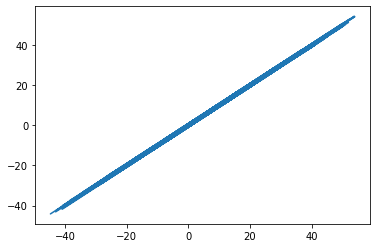

In [99]:
plt.plot(outputs,targets) #since the line is at a perfect 45º angle, we know the model fits the data and the linear regression